# **VIDEO GAMES SALES DATA**

**Name:** Shibilin Salakath

**Organization:** Entri-Elevate

# **Overview of Problem Statement**

**The dataset contains comprehensive information about video games, including their platform, genre, release year, regional sales, global sales, and critic/user ratings. By analysing this data, i aim to uncover patters and relationships that contribute to the success of video games. This analysis will provide actionable insights for understanding factors driving global sales and enable data-driven decision-making for gaming industry**

# **Objective**

**To develop a machine learning model that predicts the global sales of video games based on features such as platform, genre, critic/user scores, regional sales, and other relevant attributes**

# **Data description**

**Source: From kaggle (Video Game Sales Dataset)**

**Features:**

**Name:** Name of the video game

**Platform:** The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc.

**Year_of_release:** The year in which the game was released.

**Genre:** The genre of the video game, such as action, adventure, sports, etc

**Publisher:** The company responsible for publishing the game.

**Na_sales:** The sales of the game in North America.

**Eu_sales:** The sales of the game in Europe.

**Jp_sales:** The sales of the game in Japan.

**Other_sales:** The sales of the game in other regions.

**Global_sales:** The total sales of the game across the world.

**Critic_score:** The average score given to the game by professional critics.

**Critic_count:** The number of critics who reviewed the game.

**User_score:** The average score given to the game by user.

**User_count:** The number of users who reviewed the game.

**Developer:** The company responsible for developing the game.

**Rating:**

# **Data Collection**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [31]:
video_games=pd.read_csv('Video_Games.csv')
df=pd.DataFrame(video_games)
games=df.copy()
games.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


**Finding out the number of rows and columns**

In [33]:
games.shape

(16719, 16)

**Information about the Data**

In [35]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


NOTE: Here the "user_score column" data type is wrong.

# **EDA**

**Formatting columns names for easy handling (Converting all capital letters to small one)**

In [39]:
games.columns = games.columns.str.lower().str.strip()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

**Check for any null values**

In [41]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64

**Check any duplicate values are there**

In [43]:
games.duplicated().sum()

0

**Statical summary**

In [45]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Checking the values in user_score column, hence the data type is wrong**

In [47]:
games['user_score'].value_counts()

user_score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

NOTE: "tbd" is "To Be Decided", which we are removing that into nan value in the next step

**Replacing the tbd(to be decided) values with null values**

In [50]:
games['user_score'] = games['user_score'].replace('tbd',np.nan)
games['user_score'].value_counts()

user_score
7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: count, Length: 95, dtype: int64

In [51]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
dtype: object

NOTE: Now we have changed its data type into proper one.

In [53]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       7590 non-null   float64
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


**Hence the null values count is 2 in both "name" & "genre column". it can be deleted**

In [55]:
games[games['name'].isnull() | games['genre'].isnull()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
games = games.dropna(subset=['name', 'genre'])
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8580
critic_count       8580
user_score         9127
user_count         9127
developer          6621
rating             6767
dtype: int64

**Replacing "NaN" values in categorical column with "missing"**

In [58]:
games[['rating','developer', 'publisher']] = games[['rating','developer', 'publisher']].fillna('missing')
games.isnull().sum().sort_values(ascending = False)

user_score         9127
user_count         9127
critic_score       8580
critic_count       8580
year_of_release     269
name                  0
platform              0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
developer             0
rating                0
dtype: int64

**Now we have 5 columns with lots of missing values that cannot be dropped. if it dropped, it will impact the efficiency of my model and also lead to lact of information**

**So, filling those values with KNNImputer. which allows the imputer to find the 5 most similar rows in the dataset and make imputations for each**

In [61]:
from sklearn.impute import KNNImputer

knn_imputer=KNNImputer(n_neighbors=5)
games[['user_score','user_count','critic_score', 'critic_count',
       'year_of_release']] = knn_imputer.fit_transform(games[['user_score',
        'user_count','critic_score', 'critic_count', 'year_of_release']])

In [62]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
critic_score       0
critic_count       0
user_score         0
user_count         0
developer          0
rating             0
dtype: int64

**Outlier finding**

In [64]:
sales_column = ['na_sales','eu_sales','jp_sales','other_sales','global_sales']
score_column = ['critic_score','critic_count','user_score','user_count']

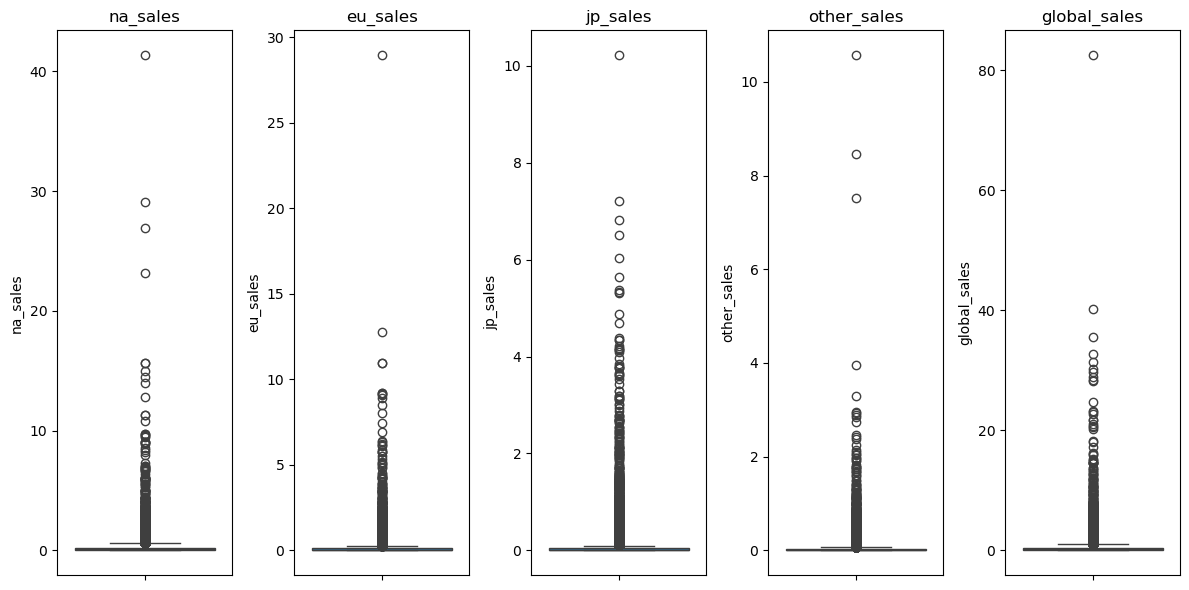

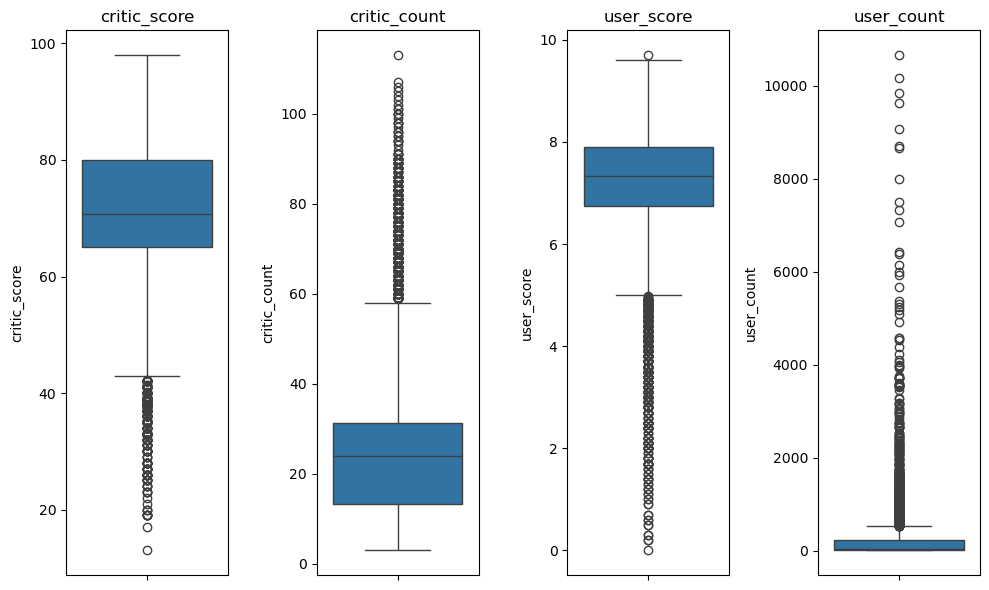

In [65]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(sales_column, 1):
    plt.subplot(1, len(sales_column), i)
    sns.boxplot(y=games[column])
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, column in enumerate(score_column, 1):
    plt.subplot(1, len(score_column), i)
    sns.boxplot(y=games[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [66]:
def correct_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1                   

    # Defining lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers to the lower and upper bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Applying outlier correction to all Sales and Score columns
for column in sales_column + score_column:
    correct_outliers(games, column)

print(games.describe())

       year_of_release      na_sales      eu_sales      jp_sales  \
count     16717.000000  16717.000000  16717.000000  16717.000000   
mean       2006.503073      0.160678      0.071330      0.023601   
std           5.837163      0.197289      0.096138      0.037680   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000      0.600000      0.275000      0.100000   

        other_sales  global_sales  critic_score  critic_count    user_score  \
count  16717.000000  16717.000000  16717.000000  16717.000000  16717.000000   
mean       0.021551      0.326076     71.372681     24.083636      7.311465   
std        0.026781      0.353708     11.157669     13.485309      0.971082   
min        0.000000      0.010000     42.500000      3.000000      5.00

**Now that we capped the outliers, check the boxplot once again to make sure capping has done properly and made any changes to the columns**

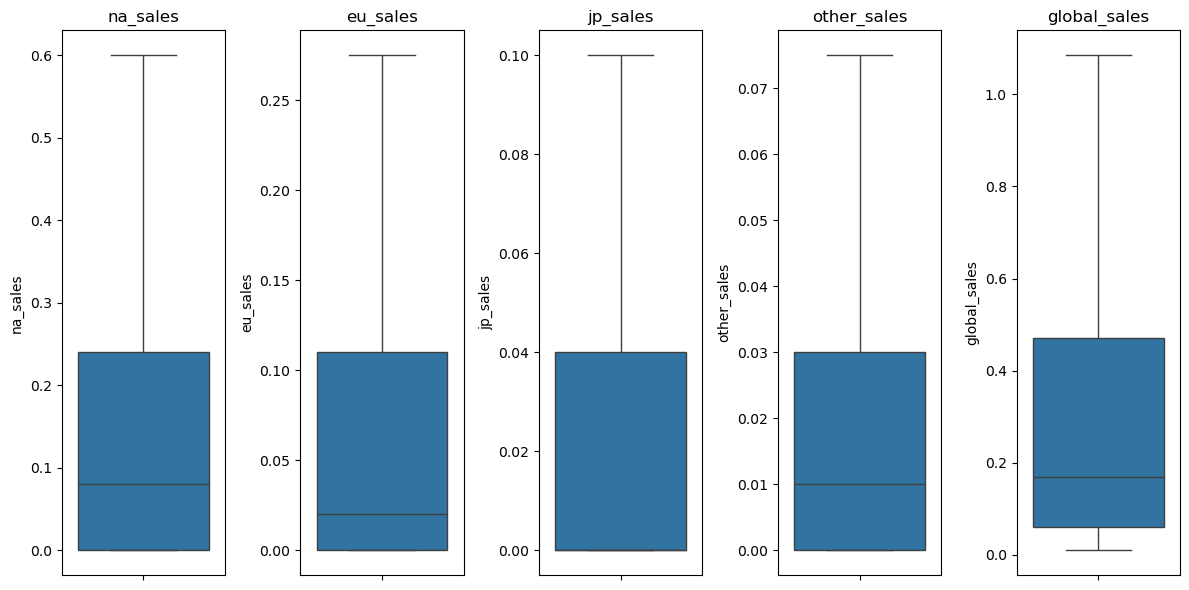

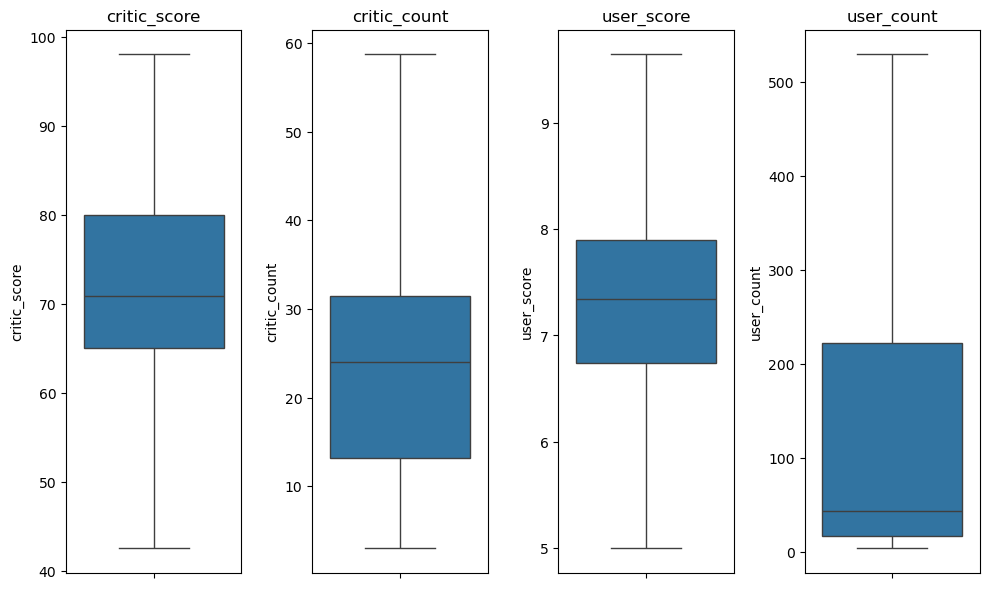

In [68]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(sales_column, 1):
    plt.subplot(1, len(sales_column), i)
    sns.boxplot(y=games[column])
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, column in enumerate(score_column, 1):
    plt.subplot(1, len(score_column), i)
    sns.boxplot(y=games[column])
    plt.title(column)
plt.tight_layout()
plt.show()

**Now the next step is finding the correlation and skewness to understand the relation and also to find out that any refinment is needed to the columns**

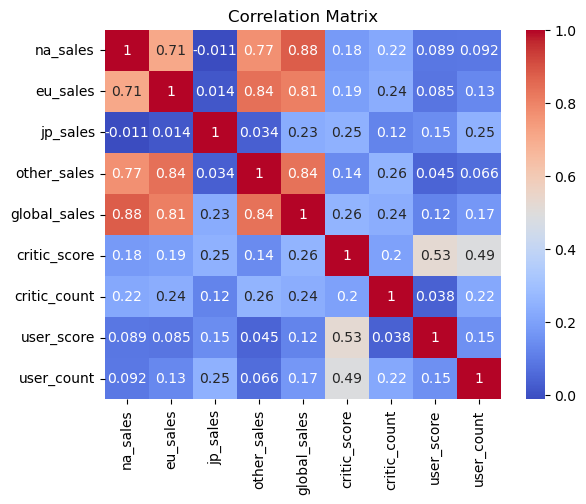

In [70]:
corr_matrix = games[sales_column + score_column].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [71]:
for column in sales_column + score_column:
    skewness = games[column].skew()
    print(f"{column}: Skewness = {skewness}")

na_sales: Skewness = 1.2393643514710584
eu_sales: Skewness = 1.2463809543832467
jp_sales: Skewness = 1.2800152261846693
other_sales: Skewness = 1.082197294725524
global_sales: Skewness = 1.1879706927277716
critic_score: Skewness = -0.44246380855355966
critic_count: Skewness = 0.7679444351092338
user_score: Skewness = -0.4976979653475835
user_count: Skewness = 1.356615450757373


**After the IQR method, we can see that the skewness is high on some columns and refinment is needed. Thus we are moving to the next refinment step which is LOG TRANSFORMATION**

In [73]:
columns_to_transform = ['na_sales', 'eu_sales', 'jp_sales', 'global_sales', 'user_count']
for column in columns_to_transform:
    games[column] = np.log1p(games[column])

In [74]:
for column in sales_column + score_column:
    skewness = games[column].skew()
    print(f"{column}: Skewness = {skewness}")

na_sales: Skewness = 1.083718616319209
eu_sales: Skewness = 1.1849866716258952
jp_sales: Skewness = 1.2645749146438232
other_sales: Skewness = 1.082197294725524
global_sales: Skewness = 0.9624826891564798
critic_score: Skewness = -0.44246380855355966
critic_count: Skewness = 0.7679444351092338
user_score: Skewness = -0.4976979653475835
user_count: Skewness = 0.1681128906086585


**Some of the columns came to the acceptable range and other didn't. although -0.5 to 0.5 is the appropriate symmetric range, -1 to 1 can also be acceptable due to moderate skewness**

# **Visualisation**

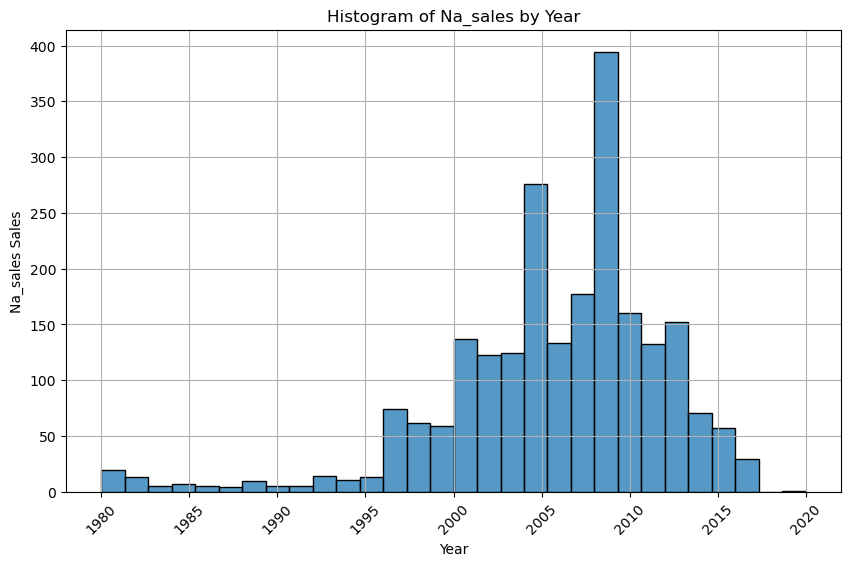

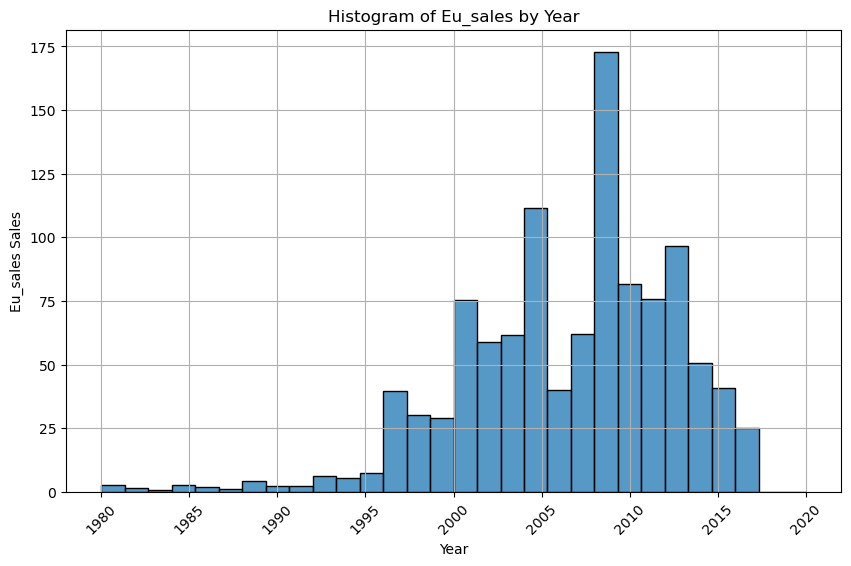

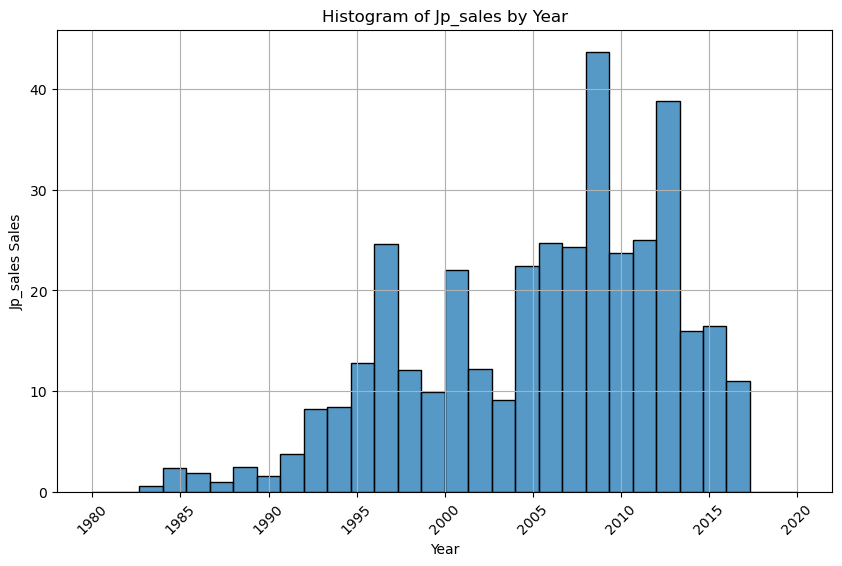

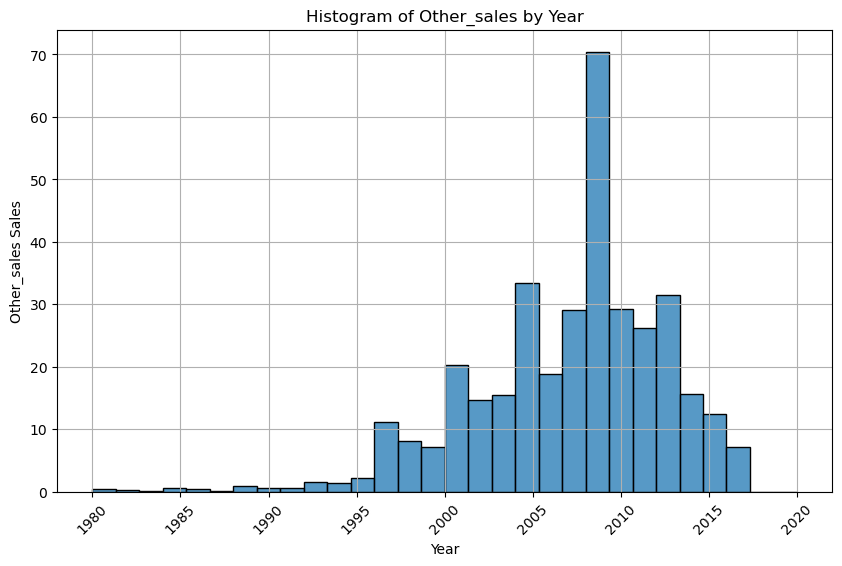

In [77]:
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for column in sales_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=games, x='year_of_release', weights=games[column], bins=30, kde=False)
    plt.title(f"Histogram of {column.capitalize()} by Year")
    plt.xlabel('Year')
    plt.ylabel(f'{column.capitalize()} Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

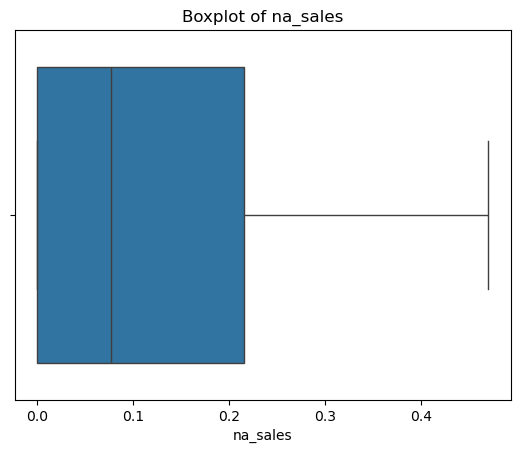

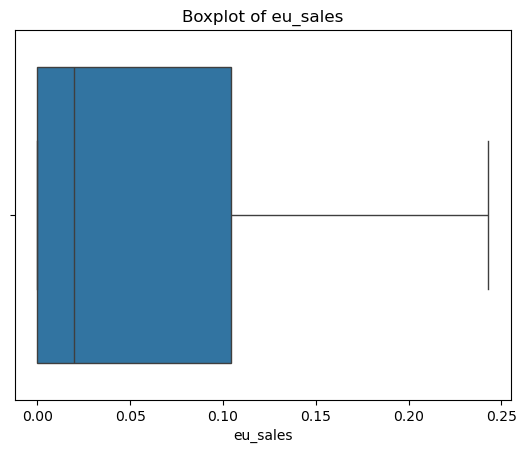

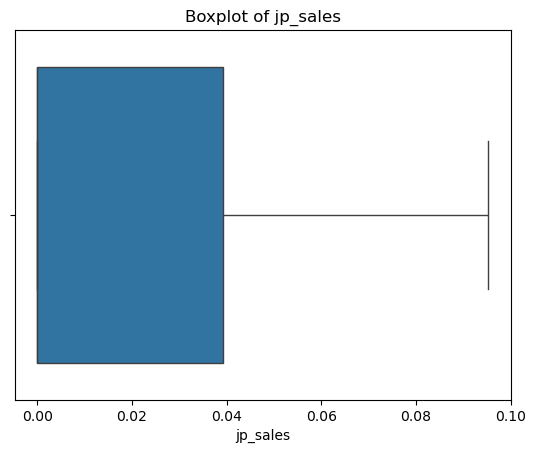

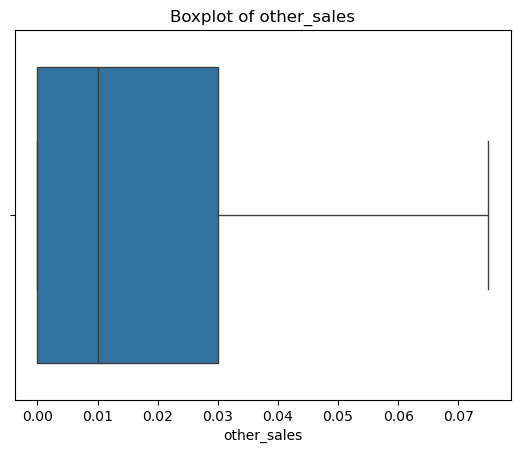

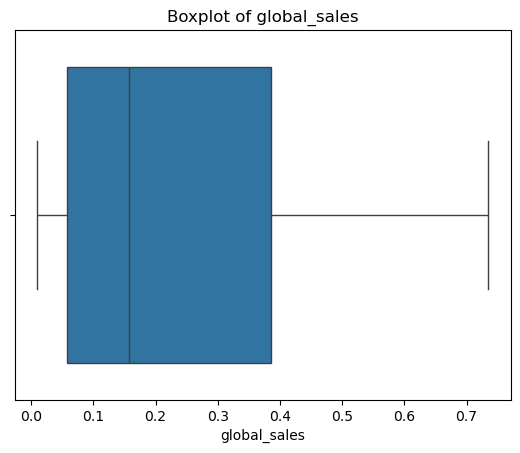

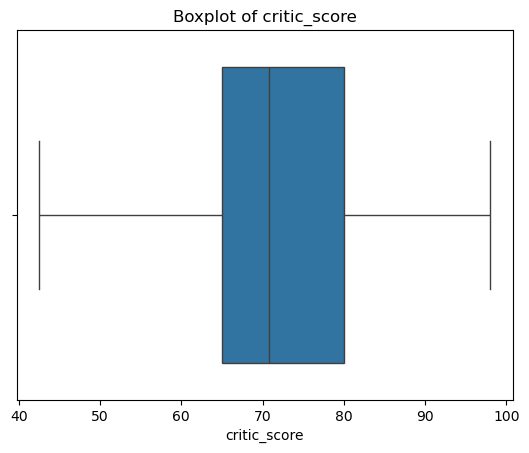

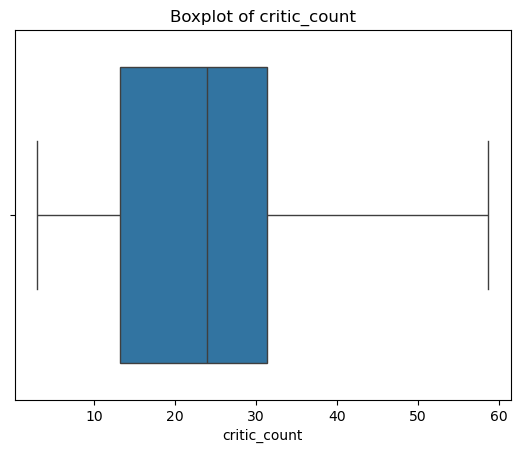

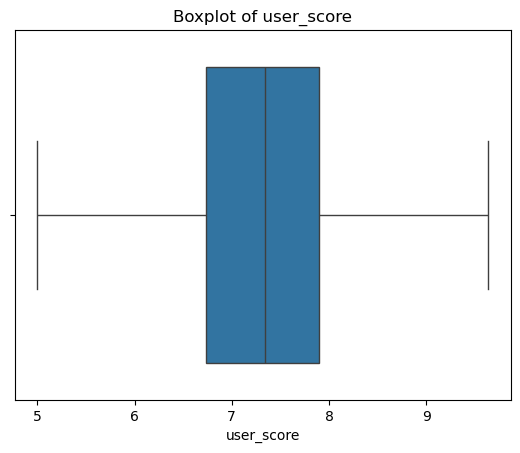

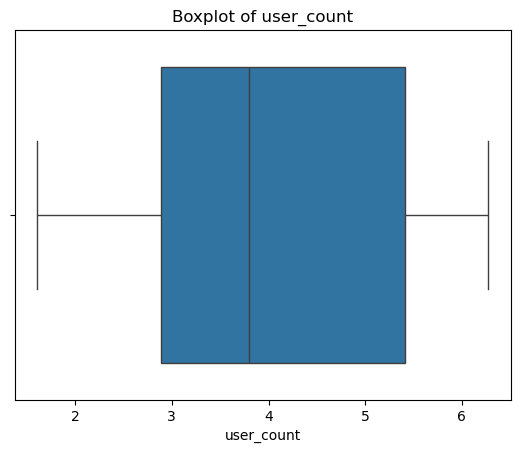

In [78]:
numerical_columns = ['na_sales','eu_sales','jp_sales','other_sales','global_sales',
                    'critic_score','critic_count','user_score','user_count']
for column in numerical_columns:
    sns.boxplot(x=games[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

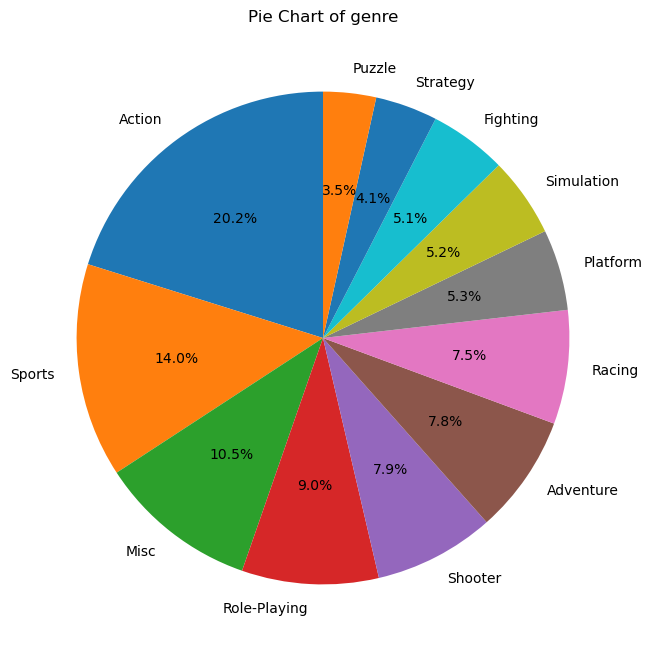

In [79]:
categorical_column = 'genre' 

games[categorical_column].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title(f"Pie Chart of {categorical_column}")
plt.ylabel('')
plt.show()

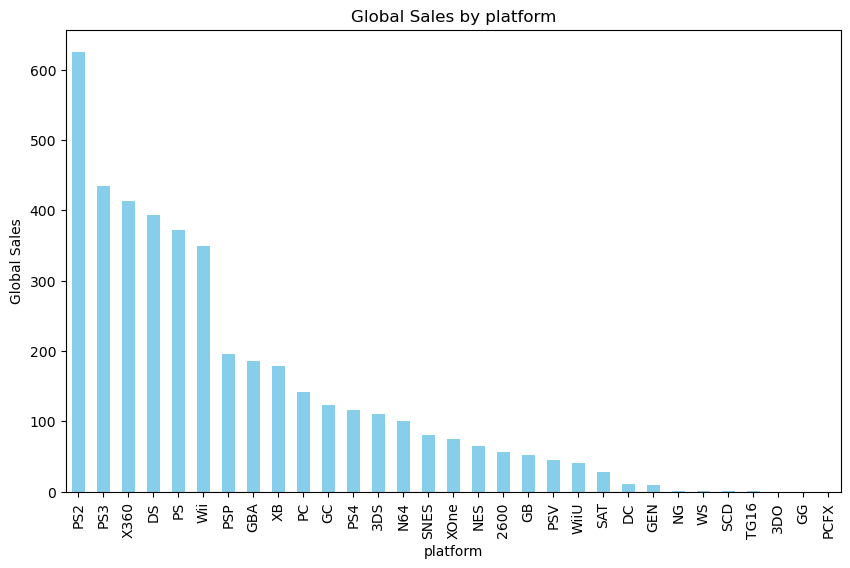

In [80]:
categorical_column = 'platform' 

platform_sales = games.groupby(categorical_column)['global_sales'].sum().sort_values(ascending=False)

platform_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f"Global Sales by {categorical_column}")
plt.xlabel(categorical_column)
plt.ylabel("Global Sales")
plt.show()

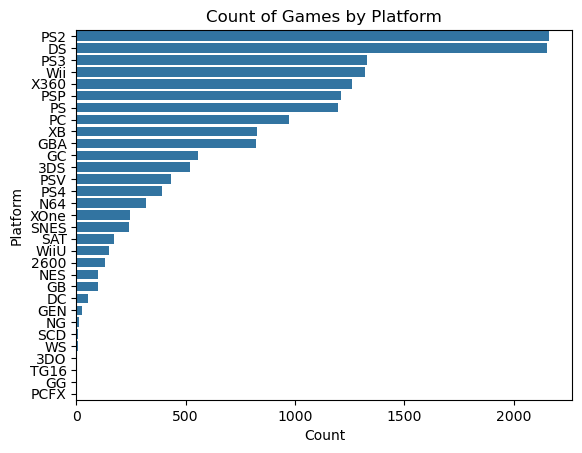

In [81]:
sns.countplot(y='platform', data=games, order=games['platform'].value_counts().index)
plt.title("Count of Games by Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

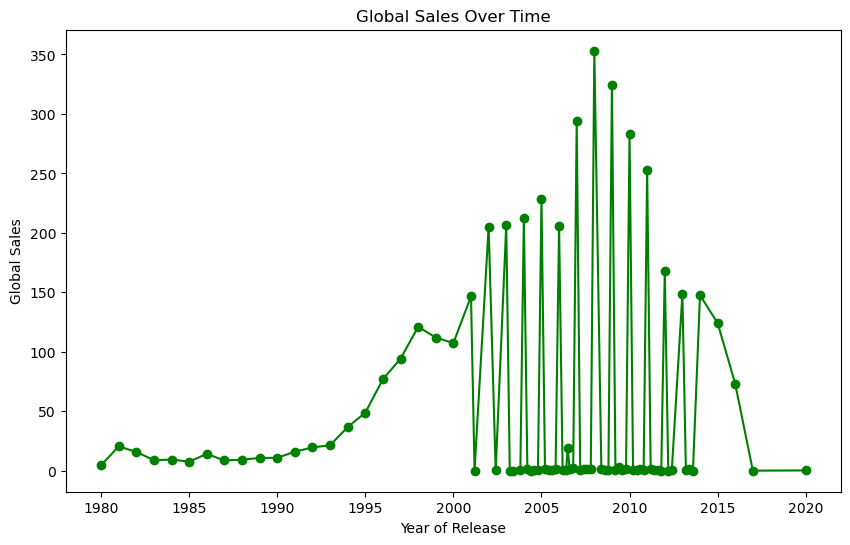

In [82]:
sales_over_time = games.groupby('year_of_release')['global_sales'].sum()

sales_over_time.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title("Global Sales Over Time")
plt.xlabel("Year of Release")
plt.ylabel("Global Sales")
plt.show()

# **Feature Engineering**

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
cc= df.select_dtypes(include= ['object']).columns.difference(['User_Score'])
print(f"Categorical columns are {cc}")

Categorical columns are Index(['Developer', 'Genre', 'Name', 'Platform', 'Publisher', 'Rating'], dtype='object')


**Label Encoding**

In [87]:
# Initialize the encoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['name','developer','publisher','rating']

# Applying LabelEncoder to each column
for column in columns_to_encode:
    games[column] = encoder.fit_transform(games[column])
games

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,11075,Wii,2006.0,Sports,361,0.470004,0.242946,0.09531,0.075,0.734769,76.0,51.0,8.00,5.777652,1020,1
1,9389,NES,1985.0,Platform,361,0.470004,0.242946,0.09531,0.075,0.734769,74.2,28.8,6.24,6.272877,1689,8
2,5613,Wii,2008.0,Racing,361,0.470004,0.242946,0.09531,0.075,0.734769,82.0,58.7,8.30,6.272877,1020,1
3,11077,Wii,2009.0,Sports,361,0.470004,0.242946,0.09531,0.075,0.734769,80.0,58.7,8.00,5.262690,1020,1
4,7392,GB,1996.0,Role-Playing,361,0.470004,0.242946,0.09531,0.075,0.734769,90.0,9.0,8.74,6.272877,1689,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,8343,PS3,2016.0,Action,503,0.000000,0.000000,0.00995,0.000,0.009950,80.8,18.2,6.80,3.737670,1689,8
16715,5160,X360,2006.0,Sports,91,0.000000,0.009950,0.00000,0.000,0.009950,67.8,31.4,7.68,3.407842,1689,8
16716,3890,PSV,2016.0,Adventure,233,0.000000,0.000000,0.00995,0.000,0.009950,80.8,18.2,6.80,3.737670,1689,8
16717,9028,GBA,2003.0,Platform,549,0.009950,0.000000,0.00000,0.000,0.009950,70.8,20.6,7.62,3.100092,1689,8


**One-Hot encoding for the "genre" and "platform" columns**

In [89]:
games = pd.get_dummies(games, columns=['genre', 'platform'], drop_first=True)

In [90]:
games

,name,year_of_release,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,...,platform_SAT,platform_SCD,platform_SNES,platform_TG16,platform_WS,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
0,11075,2006.0,361,0.470004,0.242946,0.09531,0.075,0.734769,76.0,51.0,...,False,False,False,False,False,True,False,False,False,False
1,9389,1985.0,361,0.470004,0.242946,0.09531,0.075,0.734769,74.2,28.8,...,False,False,False,False,False,False,False,False,False,False
2,5613,2008.0,361,0.470004,0.242946,0.09531,0.075,0.734769,82.0,58.7,...,False,False,False,False,False,True,False,False,False,False
3,11077,2009.0,361,0.470004,0.242946,0.09531,0.075,0.734769,80.0,58.7,...,False,False,False,False,False,True,False,False,False,False
4,7392,1996.0,361,0.470004,0.242946,0.09531,0.075,0.734769,90.0,9.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,8343,2016.0,503,0.000000,0.000000,0.00995,0.000,0.009950,80.8,18.2,...,False,False,False,False,False,False,False,False,False,False
16715,5160,2006.0,91,0.000000,0.009950,0.00000,0.000,0.009950,67.8,31.4,...,False,False,False,False,False,False,False,True,False,False
16716,3890,2016.0,233,0.000000,0.000000,0.00995,0.000,0.009950,80.8,18.2,...,False,False,False,False,False,False,False,False,False,False
16717,9028,2003.0,549,0.009950,0.000000,0.00000,0.000,0.009950,70.8,20.6,...,False,False,False,False,False,False,False,False,False,False


**Define features and target**

In [92]:
X = games.drop(['global_sales'], axis=1)
y = games['global_sales']
X

,name,year_of_release,publisher,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,...,platform_SAT,platform_SCD,platform_SNES,platform_TG16,platform_WS,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
0,11075,2006.0,361,0.470004,0.242946,0.09531,0.075,76.0,51.0,8.00,...,False,False,False,False,False,True,False,False,False,False
1,9389,1985.0,361,0.470004,0.242946,0.09531,0.075,74.2,28.8,6.24,...,False,False,False,False,False,False,False,False,False,False
2,5613,2008.0,361,0.470004,0.242946,0.09531,0.075,82.0,58.7,8.30,...,False,False,False,False,False,True,False,False,False,False
3,11077,2009.0,361,0.470004,0.242946,0.09531,0.075,80.0,58.7,8.00,...,False,False,False,False,False,True,False,False,False,False
4,7392,1996.0,361,0.470004,0.242946,0.09531,0.075,90.0,9.0,8.74,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,8343,2016.0,503,0.000000,0.000000,0.00995,0.000,80.8,18.2,6.80,...,False,False,False,False,False,False,False,False,False,False
16715,5160,2006.0,91,0.000000,0.009950,0.00000,0.000,67.8,31.4,7.68,...,False,False,False,False,False,False,False,True,False,False
16716,3890,2016.0,233,0.000000,0.000000,0.00995,0.000,80.8,18.2,6.80,...,False,False,False,False,False,False,False,False,False,False
16717,9028,2003.0,549,0.009950,0.000000,0.00000,0.000,70.8,20.6,7.62,...,False,False,False,False,False,False,False,False,False,False


In [93]:
y

0        0.734769
1        0.734769
2        0.734769
3        0.734769
4        0.734769
           ...   
16714    0.009950
16715    0.009950
16716    0.009950
16717    0.009950
16718    0.009950
Name: global_sales, Length: 16717, dtype: float64

**Train,Test and Split**

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Selection**

In [97]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

In [98]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

In [99]:
selected_features = X.columns[selector.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'critic_score', 'critic_count', 'user_count', 'genre_Adventure',
       'platform_NES'],
      dtype='object')

Feature Scores:
               Feature         Score
3             na_sales  54476.138672
6          other_sales  41078.300477
4             eu_sales  31103.226682
7         critic_score   1109.553989
5             jp_sales    948.812054
8         critic_count    920.560665
10          user_count    442.405019
1      year_of_release    440.103626
13     genre_Adventure    428.021705
34        platform_NES    295.633492
9           user_score    245.651814
36         platform_PC    207.315106
27         platform_DS    204.672910
42        platform_PSP    182.016618
12              rating    174.663466
43        platform_PSV    170.366475
40        platform_PS3    141.879620
51       platform_X360    138.146966
28         platform_GB    137.059446
11           developer    111

In [100]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Select top N features
top_n = 10
selected_features = feature_scores.head(top_n)['Feature'].values

print("Selected Features:", selected_features)
print("\nFeature Importance Scores:")
print(feature_scores)

Selected Features: ['na_sales' 'other_sales' 'jp_sales' 'eu_sales' 'year_of_release' 'name'
 'publisher' 'user_count' 'critic_score' 'user_score']

Feature Importance Scores:
               Feature    Importance
3             na_sales  7.422684e-01
6          other_sales  1.024628e-01
5             jp_sales  5.482229e-02
4             eu_sales  5.458922e-02
1      year_of_release  1.003988e-02
0                 name  9.386582e-03
2            publisher  4.570973e-03
10          user_count  2.492811e-03
7         critic_score  2.409174e-03
9           user_score  2.134055e-03
8         critic_count  2.049957e-03
46       platform_SNES  1.616187e-03
11           developer  1.072737e-03
28         platform_GB  1.009468e-03
19  genre_Role-Playing  8.080664e-04
38         platform_PS  8.019164e-04
39        platform_PS2  7.694741e-04
15          genre_Misc  6.221924e-04
33        platform_N64  4.788895e-04
17        genre_Puzzle  4.187111e-04
25        platform_3DS  4.161812e-04
23      gen

**Here i chose Random forest, hence the goal is to build a model which can predict global sales. The sales are influenced by various non-linear factors (sales in different region, genre, platform etc) and random forest can capture those non-linear relationships between features and the target variables.**